In [1]:
import pandas as pd
import numpy as np


In [10]:
df= pd.read_csv('rapedataset.csv')

In [11]:
df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [12]:
df.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
# we don't need the Total Rape Victims subgroup (we can do that in Pandas), let's remove it
df = df[df['Subgroup'] != 'Total Rape Victims']

# let's check if the all the rape cases are reported
df[df['Victims_of_Rape_Total'] != df['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


In [17]:
df['Unreported_Cases'] = df['Victims_of_Rape_Total'] - df['Rape_Cases_Reported']

In [18]:
df.columns


Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs', 'Unreported_Cases'],
      dtype='object')

In [19]:
# let's taka a look at the new dataframe
df[df['Unreported_Cases'] > 0].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0,1
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45,2
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31,4
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49,8
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67,3


In [20]:
# let's plot the unreported rape cases sorted by states throughout 2001 to 2010


In [44]:
#unreported_victims_by_state =
dfur = df.groupby('Area_Name').sum()


In [46]:
dfur.drop('Year', axis = 1, inplace = True)

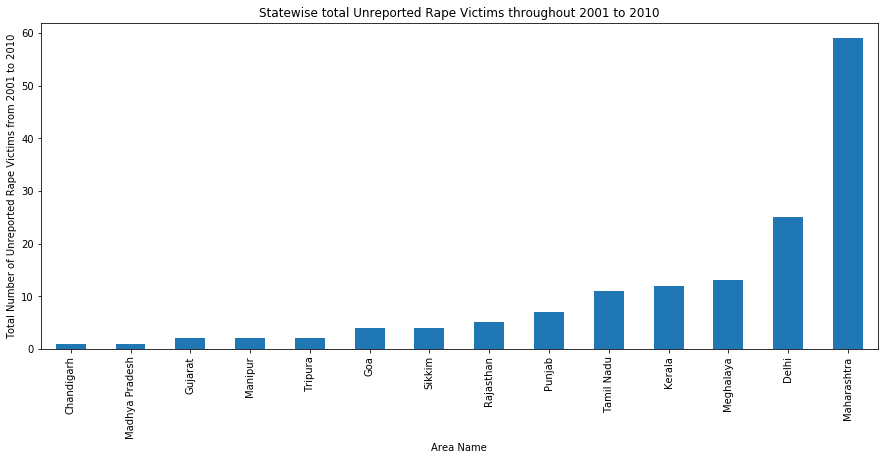

In [47]:
plt.subplots(figsize=(15,6))
rt = dfur[dfur['Unreported_Cases']>0]['Unreported_Cases'].sort_values()
ax = rt.plot.bar()
                                                                                    
ax.set_xlabel('Area Name')
ax.set_ylabel('Total Number of Unreported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Unreported Rape Victims throughout 2001 to 2010')
plt.show()                                                                                  

In [48]:
#dfrs = rape_victims_by_state 
dfrs = df.groupby('Area_Name').sum()
dfrs.drop('Year', axis=1, inplace=True)
print('total rape victims :', df['Rape_Cases_Reported'].sum())  # dfu = unreported victims by state

total rape victims : 190008


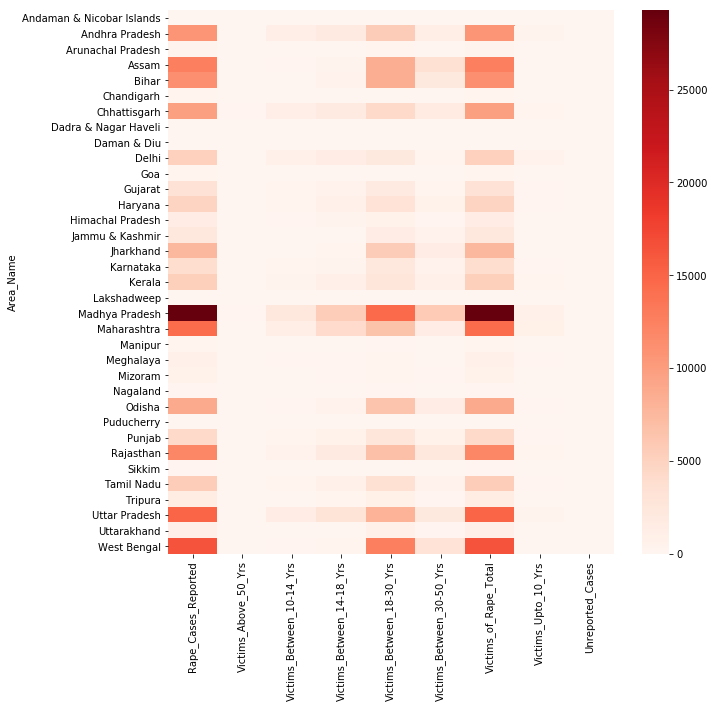

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(dfrs, cmap='Reds')
plt.show()

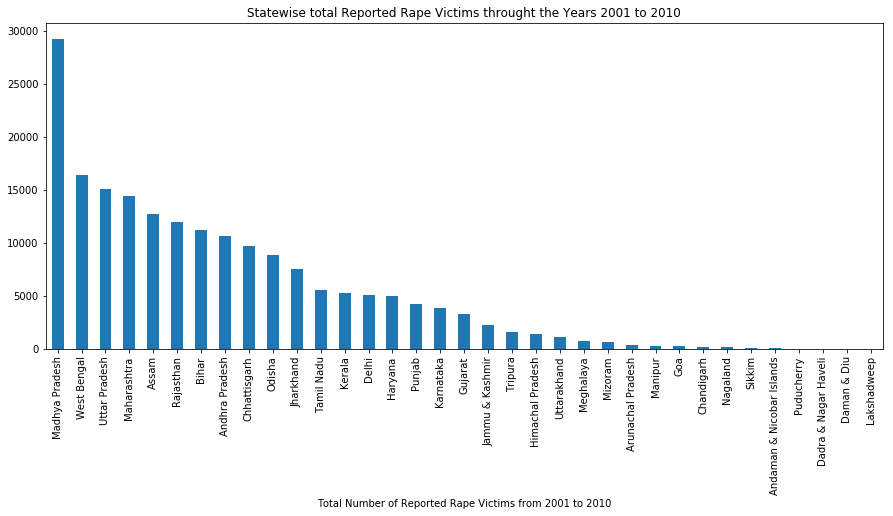

Area_Name
Madhya Pradesh               29256
West Bengal                  16378
Uttar Pradesh                15053
Maharashtra                  14446
Assam                        12762
Rajasthan                    11949
Bihar                        11263
Andhra Pradesh               10696
Chhattisgarh                  9751
Odisha                        8860
Jharkhand                     7563
Tamil Nadu                    5538
Kerala                        5296
Delhi                         5146
Haryana                       5009
Punjab                        4300
Karnataka                     3917
Gujarat                       3337
Jammu & Kashmir               2230
Tripura                       1624
Himachal Pradesh              1453
Uttarakhand                   1101
Meghalaya                      726
Mizoram                        646
Arunachal Pradesh              412
Manipur                        271
Goa                            266
Chandigarh                     227
Nagaland  

In [50]:
plt.subplots(figsize=(15,6))
rt1 = dfrs['Rape_Cases_Reported'].sort_values(ascending=False)
ax= rt1.plot.bar()

ax.set_xlabel('Area_Name')
ax.set_xlabel('Total Number of Reported Rape Victims from 2001 to 2010')
ax.set_title('Statewise total Reported Rape Victims throught the Years 2001 to 2010')
plt.show()

print(rt1)

In [51]:
#Exploring Data for Madhya Pradesh

In [52]:
mp_rape_victims = df[df['Area_Name']=='Madhya Pradesh']

In [53]:
mp_rape_victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_Cases
571,Madhya Pradesh,2001,Victims of Incest Rape,301,0,39,66,130,56,301,10,0
572,Madhya Pradesh,2001,Victims of Other Rape,2550,27,265,491,1120,571,2550,76,0
574,Madhya Pradesh,2002,Victims of Incest Rape,72,1,11,16,37,4,72,3,0
575,Madhya Pradesh,2002,Victims of Other Rape,2819,13,174,236,1512,807,2819,77,0
577,Madhya Pradesh,2003,Victims of Incest Rape,123,0,10,23,71,16,123,3,0


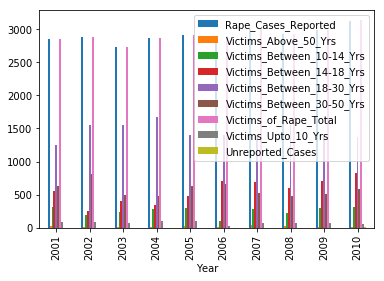

In [62]:
mp_rape_victims_byyear = mp_rape_victims.groupby('Year').sum()
mp_rape_victims_byyear.plot.bar()
plt.show()